# 3. Basic Statistics

_Damian Trilling and Penny Sheets_

This notebook is designed to show you some ways to use python for basic
statistical analysis of numbers, and to explore some methods that go beyond
`df.describe()` or `Counter()`, which we used last week. In particular, we are
going to look into analyzing numerical data. Next week, we will focus on textual
data.

The dataset we use in this example is a subset of the data presented in
Trilling, D. (2013). _Following the news. Patterns of online and offline news
use_. PhD thesis, University of Amsterdam. http://hdl.handle.net/11245/1.394551


### Import our tools/modules/libraries

As always, we first import the tools we'll need. Today, we'll use pandas
(usually imported as "pd"), and something called statsmodels, and something
called numpy. We also use matplotlib for some visualizations. A lot of other
stuff here we will need for some specific analyses later on; you don't have to
worry about all of it right now.

If you want to learn more about these modules, you can look online for info.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import kendalltau
import numpy as np

### Read data into a dataframe

We will read a dataset based on Trilling (2013). It contains some
sociodemographic variables as well as the number of days the respondent uses a
specific medium to access information about news and current affairs.

You should download the dataset (with the 'save page as' method, making sure
.txt isn't appended to the file extension) into the same folder as this jupyter
notebook:
https://raw.githubusercontent.com/damian0604/bdaca/master/ipynb/mediause.csv

Remember that the 'df' here is arbitrary; last week we used the names 'iris' and
'stockdata' and others; this week we're going more basic and just saying 'df'
for dataframe.


In [2]:
# df = pd.read_csv('mediause.csv') # if you downloaded and stored the file locally 
df = pd.read_csv('https://raw.githubusercontent.com/damian0604/bdaca/master/ipynb/mediause.csv') # if directly reading it from source 

Using the .keys() method is way to find out what the columns are in your
dataframe. Sometimes they have nice labels already, and sometimes they don't. In
this case, we're in luck.


In [3]:
df.keys()

Index(['gender', 'age', 'education', 'radio', 'newspaper', 'tv', 'internet'], dtype='object')

Remember that for a dataframe or object in python, you can simply type its name
in a code cell and python will display it as best it can. (In this case, it
works well.)


In [4]:
df

,gender,age,education,radio,newspaper,tv,internet
0,1,71,4.0,5,6,5,0
1,1,40,2.0,6,0,0,0
2,1,41,2.0,4,3,7,3
3,0,65,5.0,0,0,5,0
4,0,39,2.0,0,1,7,7
...,...,...,...,...,...,...,...
2076,0,49,5.0,3,6,6,0
2077,0,51,4.0,7,7,5,5
2078,1,31,6.0,3,5,5,6
2079,0,58,6.0,3,3,1,0


### Explore the dataset

Let's do some descriptive statistics, using the .describe() method we saw last
week. This would be important if you wanted to describe the dataset to your
audience, for example.


In [5]:
df.describe()

,gender,age,education,radio,newspaper,tv,internet
count,2081.000000,2081.000000,2065.000000,2081.000000,2081.000000,2081.000000,2081.000000
mean,0.481499,46.073522,4.272639,3.333974,3.111004,4.167227,2.684286
std,0.499778,18.267401,1.661451,2.699082,2.853082,2.517039,2.786262
min,0.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,3.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,46.000000,4.000000,4.000000,3.000000,5.000000,2.000000
75%,1.000000,61.000000,6.000000,6.000000,6.000000,7.000000,5.000000
max,1.000000,95.000000,7.000000,7.000000,7.000000,7.000000,7.000000


If you want to find out how many possible values there are for a specific
variable, you can use the `.value_counts()` method. In this case, you select the
dataframe (which we've called `df`), select the column/variable you want to
examine, and then apply the method.

The output shows us that there are two values - 0 and 1 - for the 'gender'
variable. It gives us how many instances (aka frequencies) of each of these
values exist in the dataset.


In [6]:
df['gender'].value_counts()

gender
0    1079
1    1002
Name: count, dtype: int64

In [7]:
#as with any method, value_counts() has parameters we can adjust.
#by default, the results are sorted by size of the count, but we can
#also allow it to be random if we wanted. Compare the results.

df['education'].value_counts(sort=False)

education
4.0    667
2.0    323
5.0    178
6.0    396
3.0    214
7.0    219
1.0     68
Name: count, dtype: int64

In [8]:
df['education'].value_counts(sort=True)

education
4.0    667
6.0    396
2.0    323
7.0    219
3.0    214
5.0    178
1.0     68
Name: count, dtype: int64

In [9]:
#if it is useful to sort by the index - i.e. days of the week here - then you can specify that as follows:
df['education'].value_counts().sort_index()

education
1.0     68
2.0    323
3.0    214
4.0    667
5.0    178
6.0    396
7.0    219
Name: count, dtype: int64

In [10]:
#You can also use a help command to get python to print info about this method. But in this case, 
#you have to make an additional step, because the selected column isn't an object until
#it is officially run in a 'real' command. So you have to turn that into an object, and then ask for help.

test = df['education']
test.value_counts?

Signature:
test.value_counts(
    normalize: 'bool' = False,
    sort: 'bool' = True,
    ascending: 'bool' = False,
    bins=None,
    dropna: 'bool' = True,
) -> 'Series'
Docstring:
Return a Series containing counts of unique values.

The resulting object will be in descending order so that the
first element is the most frequently-occurring element.
Excludes NA values by default.

Parameters
----------
normalize : bool, default False
    If True then the object returned will contain the relative
    frequencies of the unique values.
sort : bool, default True
    Sort by frequencies when True. Preserve the order of the data when False.
ascending : bool, default False
    Sort in ascending order.
bins : int, optional
    Rather than count values, group them into half-open bins,
    a convenience for ``pd.cut``, only works with numeric data.
dropna : bool, default True
    Don't include counts of NaN.

Returns
-------
Series

See Also
--------
Series.count: Number of non-NA elements in 

You can also display value counts for multiple variables at once, to get an
overview of your data. In this case, use a loop to replicate commands for each
of the four media types. We'll do this next, but we'll also set a few
specifications so that it prints out nicely.

See if you can figure out what each of these print commands is doing.


In [11]:
for medium in ['radio','newspaper','tv','internet']:
    print(medium.upper())
    print(df[medium].value_counts(sort=True, normalize=True))
    print('-------------------------------------------\n')
    

RADIO
radio
0    0.292167
7    0.199904
5    0.169149
3    0.082653
4    0.075925
2    0.066314
6    0.058145
1    0.055742
Name: proportion, dtype: float64
-------------------------------------------

NEWSPAPER
newspaper
0    0.356559
6    0.252763
7    0.126862
1    0.081211
2    0.061028
5    0.055262
3    0.038443
4    0.027871
Name: proportion, dtype: float64
-------------------------------------------

TV
tv
7    0.271024
5    0.149447
0    0.143681
6    0.112446
4    0.095147
3    0.082653
2    0.074003
1    0.071600
Name: proportion, dtype: float64
-------------------------------------------

INTERNET
internet
0    0.389716
7    0.197021
1    0.090822
2    0.083614
3    0.072081
5    0.069678
4    0.049976
6    0.047093
Name: proportion, dtype: float64
-------------------------------------------



So that's one way to start exploring a dataset generally.

## Groupby

Let's say you'd like to compare the media use of men and women in the dataset.
Eventually we'll move toward statistical comparison, but for now we can start by
looking at their descriptive statistics - separately for men and women.

In python, this is quite easy, using the `.groupby()` method.

First, we group the dataframe by the 'gender' variable, and then apply a method
to that grouped dataframe; this is called 'chaining' multiple methods together.
(We saw a bit of this chaining idea last week already.)


In [12]:
df.groupby('gender').describe()

age                                                     education  \
         count       mean        std   min   25%   50%   75%   max     count   
gender                                                                         
0       1079.0  44.744208  17.508053  13.0  30.0  44.0  59.0  86.0    1072.0   
1       1002.0  47.504990  18.956032  13.0  33.0  47.0  63.0  95.0     993.0   

                  ...   tv      internet                                     \
            mean  ...  75%  max    count      mean       std  min  25%  50%   
gender            ...                                                         
0       4.212687  ...  7.0  7.0   1079.0  2.370714  2.682610  0.0  0.0  1.0   
1       4.337362  ...  7.0  7.0   1002.0  3.021956  2.856809  0.0  0.0  2.0   

                  
        75%  max  
gender            
0       5.0  7.0  
1       6.0  7.0  

[2 rows x 48 columns]

Sometimes in this case, it's more useful to transpose the dataset, making
columns into rows and vice versa. This display will then be much easier to look
at. In this case, we use a .T at the end, after the describe() method. This
doesn't change the dataframe in any way, just displays it differently for you
here.


In [13]:
df.groupby('gender').describe().T

gender                     0            1
age       count  1079.000000  1002.000000
          mean     44.744208    47.504990
          std      17.508053    18.956032
          min      13.000000    13.000000
          25%      30.000000    33.000000
          50%      44.000000    47.000000
          75%      59.000000    63.000000
          max      86.000000    95.000000
education count  1072.000000   993.000000
          mean      4.212687     4.337362
          std       1.600510     1.723294
          min       1.000000     1.000000
          25%       3.000000     3.000000
          50%       4.000000     4.000000
          75%       6.000000     6.000000
          max       7.000000     7.000000
radio     count  1079.000000  1002.000000
          mean      3.068582     3.619760
          std       2.697646     2.672636
          min       0.000000     0.000000
          25%       0.000000     0.000000
          50%       3.000000     4.000000
          75%       5.000000     6.000000
          max       7.000000     7.000000
newspaper count  1079.000000  1002.000000
          mean      2.936052     3.299401
          std       2.838018     2.858672
          min       0.000000     0.000000
          25%       0.000000     0.000000
          50%       2.000000     3.000000
          75%       6.000000     6.000000
          max       7.000000     7.000000
tv        count  1079.000000  1002.000000
          mean      4.075996     4.265469
          std       2.529193     2.501425
          min       0.000000     0.000000
          25%       2.000000     2.000000
          50%       5.000000     5.000000
          75%       7.000000     7.000000
          max       7.000000     7.000000
internet  count  1079.000000  1002.000000
          mean      2.370714     3.021956
          std       2.682610     2.856809
          min       0.000000     0.000000
          25%       0.000000     0.000000
          50%       1.000000     2.000000
          75%       5.000000     6.000000
          max       7.000000     7.000000

In [14]:
#try this again here, using a different variable as the grouping variable.


In [14]:
#you can use help again here, to figure out all the specifications.

df.groupby?

Signature:
df.groupby(
    by=None,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    level: 'IndexLabel | None' = None,
    as_index: 'bool' = True,
    sort: 'bool' = True,
    group_keys: 'bool' = True,
    observed: 'bool | lib.NoDefault' = <no_default>,
    dropna: 'bool' = True,
) -> 'DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, pd.Grouper or list of such
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If a list or ndarray of length

And, as we did last week, you can plot a simple histogram of the distribution of
a variable across the dataset. So if you want to look at how 'radio' (as in, how
many days per week a person uses radio) is distributed among your sample, e.g.,
you can use a histogram.


<Axes: >

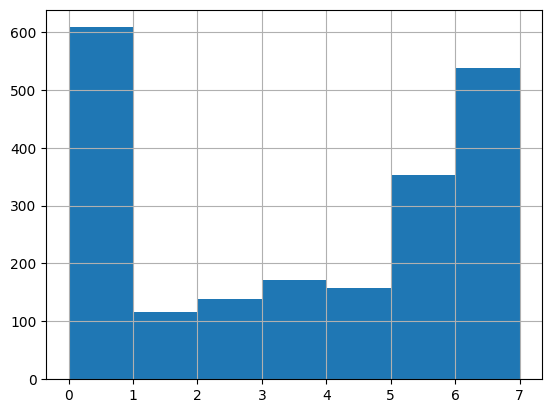

In [15]:
#Here, 'bins' refers to how many bars we want, essentially. If you don't specify, python/pandas will guess based
#on the dataset. This can be misleading. So if you know how many you want to display, you should specify.

df['radio'].hist(bins=7)

In [17]:
#Try to plot a histogram of internet news use here:


One of the modules we imported above helps us to make prettier plots (but no,
it's not called "pretty plot" like "pretty print"). Here we can plot the value
counts for internet news use in a bar chart, again sorted by the index.

In particular, the histogram above is very good for continous variables, that we
want to 'bin' into fewer bins (=bars). But if we only have a small number of
discrete values (like here: the integers from 0 to 7), then the alignment of the
labels above may be more confusing.

Let's try to use `.plot()` to make a bar chart:


<Axes: xlabel='internet'>

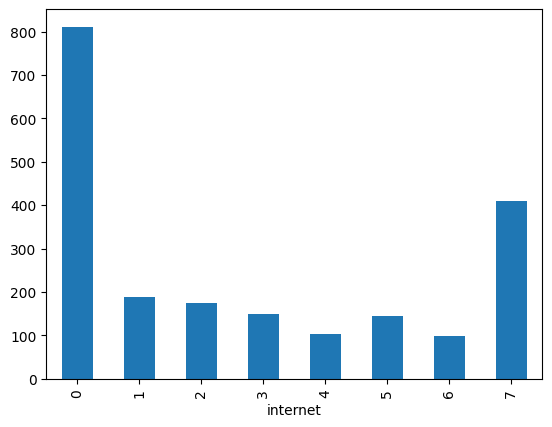

In [16]:
df['internet'].value_counts().sort_index().plot(kind='bar')

## POP QUIZ!

Can you integrate this plotting method in your for-loop (from above) to get a
nice series of plots? Fill in the missing line of code, below. But keep the
plt.show() command afterward, in order to display all plots.


In [17]:
for medium in ['radio','newspaper','tv','internet']:
    print(medium.upper())
    print(df[medium].value_counts(sort=True, normalize=True))
    print('-------------------------------------------\n')
    #YOUR CODE HERE
    plt.show()

RADIO
radio
0    0.292167
7    0.199904
5    0.169149
3    0.082653
4    0.075925
2    0.066314
6    0.058145
1    0.055742
Name: proportion, dtype: float64
-------------------------------------------

NEWSPAPER
newspaper
0    0.356559
6    0.252763
7    0.126862
1    0.081211
2    0.061028
5    0.055262
3    0.038443
4    0.027871
Name: proportion, dtype: float64
-------------------------------------------

TV
tv
7    0.271024
5    0.149447
0    0.143681
6    0.112446
4    0.095147
3    0.082653
2    0.074003
1    0.071600
Name: proportion, dtype: float64
-------------------------------------------

INTERNET
internet
0    0.389716
7    0.197021
1    0.090822
2    0.083614
3    0.072081
5    0.069678
4    0.049976
6    0.047093
Name: proportion, dtype: float64
-------------------------------------------



And instead of (or in addition to) the plt.show(), you can also save these plots
to your folder on your computer. These are very high quality images then, that
could be used in a piece (if you provided appropriate axis titles, etc.), and
you can specify the figure size and DPI.

Note here we've added a 'figsize' specification to the end of the plot method in
your missing line of code. You can play around with different figure sizes to
see what happens, if you display them here using plt.show().


In [18]:
for medium in ['radio','newspaper','tv','internet']:
    print(medium.upper())
    print(df[medium].value_counts(sort=True, normalize=True))
    print('-------------------------------------------\n')
    #YOUR CODE HERE ...(kind='bar', figsize=(6,4))
    plt.savefig('{}.png'.format(medium), dpi=400)
    plt.show()

#Now go check your folder and see if the image files have shown up.
#Note that we have to use the curly brackets and .format(medium) to give 
#the relevant title to each figure. 

RADIO
radio
0    0.292167
7    0.199904
5    0.169149
3    0.082653
4    0.075925
2    0.066314
6    0.058145
1    0.055742
Name: proportion, dtype: float64
-------------------------------------------



<Figure size 640x480 with 0 Axes>

NEWSPAPER
newspaper
0    0.356559
6    0.252763
7    0.126862
1    0.081211
2    0.061028
5    0.055262
3    0.038443
4    0.027871
Name: proportion, dtype: float64
-------------------------------------------



<Figure size 640x480 with 0 Axes>

TV
tv
7    0.271024
5    0.149447
0    0.143681
6    0.112446
4    0.095147
3    0.082653
2    0.074003
1    0.071600
Name: proportion, dtype: float64
-------------------------------------------



<Figure size 640x480 with 0 Axes>

INTERNET
internet
0    0.389716
7    0.197021
1    0.090822
2    0.083614
3    0.072081
5    0.069678
4    0.049976
6    0.047093
Name: proportion, dtype: float64
-------------------------------------------



<Figure size 640x480 with 0 Axes>

### Plots grouped by variables

You can also create comparison histograms, side-by-side, for different values of
a variable. For example, let's look at the histogram of internet news use for
men and women in this dataset.

Here, we're using the "by=[' ']" command to specify which grouping variable we
want, and again specifying the bins and the figure size, both of which you can
play around with.


array([<Axes: title={'center': '(0,)'}>, <Axes: title={'center': '(1,)'}>],
      dtype=object)

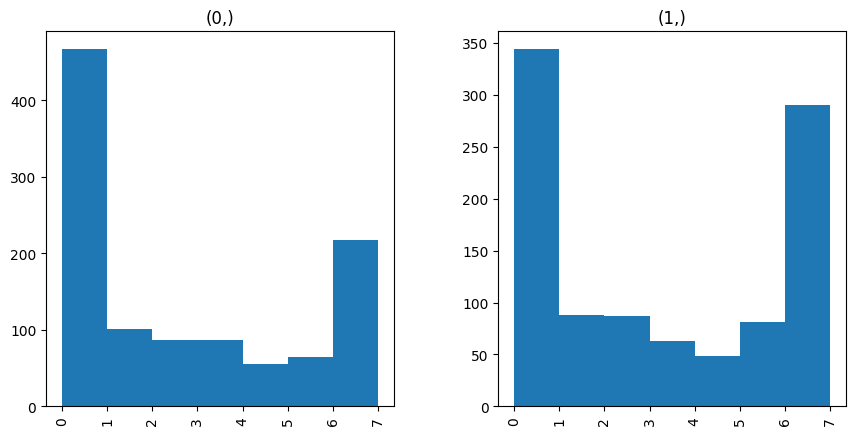

In [19]:
df.hist(column='internet', by=['gender'], bins=7, figsize=(10,5))

## Statistical tests and subsetting datasets

Now, if we want to move onto statistical comparisons, we can run our normal,
basic statistics here in python as well. There's no need to import your datset
to SPSS to do this, if you want to know whether a specific difference is
significant, for example.

### T-tests

Let's start with a t-test, comparing the mean internet news use for men and
women that we just examined in the histograms.

In order to do this, we have to create two new little dataframes out of our
first one - one for men, one for women.

We are using the ability to filter a dataframe (e.g., `df[df['gender']==1]` to
create a dataframe only for males; adding `['internet']` at the end selects only
the column for internet). This can be handy to select only relevant data for
your story out of a much larger dataset!


In [20]:
males_internet = df[df['gender']==1]['internet']
females_internet = df[df['gender']==0]['internet']


Each of these new dataframes can then be described and explored as we do with
any pandas dataframe, and using `.describe()`, remember, gives us the mean score
(handy for our t-test!).


In [21]:
males_internet.describe()

count    1002.000000
mean        3.021956
std         2.856809
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max         7.000000
Name: internet, dtype: float64

In [22]:
females_internet.describe()

count    1079.000000
mean        2.370714
std         2.682610
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max         7.000000
Name: internet, dtype: float64

We see the male mean is 3.02, and the female mean is 2.37. But we don't know if,
based on the sample, this is a significant difference. We don't want to make
misleading claims in our story! So, run a t-test. (Specifically, an independent
samples t-test.)

The results return the test statistic, p-value, and the degrees of freedom (in
that order).


In [23]:
ttest_ind(males_internet,females_internet)

(5.363006854632647, 9.09406151669508e-08, 2079.0)

We see that males use the internet significantly more often than females (that
e-08 means the p-value is REALLY tiny).

We could also do some pretty-printing if we wanted to, to display this more
nicely for ourselves.

The ".\_f" specification is how many decimal places; the integer before the
colon is the position of the output from the default t-test command.

And again, here we see the use of ".format()" as a method to input something
from the ongoing calculation.


In [24]:
results = ttest_ind(males_internet,females_internet)
print('t({2:.0f}) = {0:.3f}, p = {1:.3f}'.format(*results))

t(2079) = 5.363, p = 0.000


Let's look into some continous variables. First of all, let us create one: We
make a subset of our dataframe that contains only the media variables, apply the
`.mean()` method to it (`axis = 1` means that we want to apply it row-wise), and
then we assign the result of this to a new colum in the original dataframe.


In [25]:
df['meanmedia'] = df[['radio','internet','newspaper','tv']].mean(axis=1)

<Axes: xlabel='age', ylabel='meanmedia'>

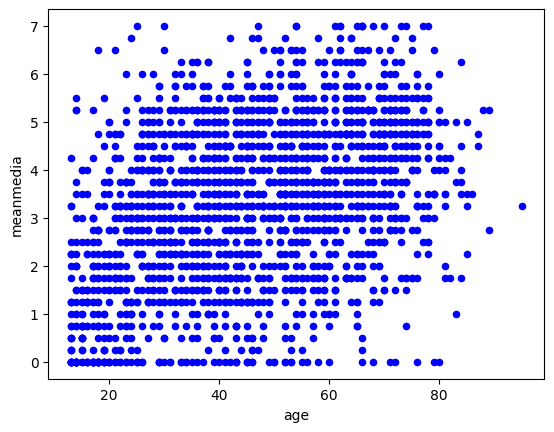

In [26]:
#We can then plot this mean media usage (for news) by age, using a scatterplot, e.g.
#Feel free to play around with the color parameters, and remember to use help commands to 
#find out more about formatting these plots.

df.plot.scatter(x='age', y='meanmedia', c='blue')

There are obviously many more possibilities here, including running a
correlation between age and mean media use, for example, or using ANOVAs if you
had more than 2 groups to compare, etc. We don't have time to show all of this
to you in class, but remember there is a ton of resources online, so you should
just search away to find what you need. If you have problems understanding
specific modules or commands you find online, you can approach us during our
open lab sessions with questions as to how to apply these techniques to your own
data story.


### Before we finish, let's play around with some more graphics

The seaborn library (which we imported at the beginning) offers a lot of cool
stuff.


First, we'll make a simple correlation matrix of the four media in this datset.


In [27]:
corrmatrix = df[['internet','tv','radio','newspaper']].corr()

In [28]:
corrmatrix

,internet,tv,radio,newspaper
internet,1.000000,0.121192,0.098797,-0.005689
tv,0.121192,1.000000,0.270031,0.350694
radio,0.098797,0.270031,1.000000,0.230926
newspaper,-0.005689,0.350694,0.230926,1.000000


But think of ways that are more useful to display this to audiences, who may not
want to deal with a correlation matrix. Heatmaps are one way to do this:


<Axes: >

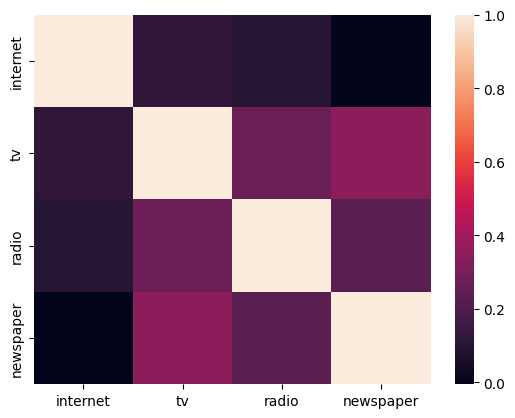

In [29]:
sns.heatmap(corrmatrix)

This looks okay, but is a bit redundant, so it would be great if we could sort
of 'white out' the unnecessary (replicated) top triangle of the chart, and use
colors that are more intuitive - usually darker means a stronger relationship in
a heat map, right?

Here, note that hardly anyone can reproduce all of this out of his head. But if
you look around online, or use what we show you here and adapt it, you can do a
lot of amazing graphics stuff.


<Axes: >

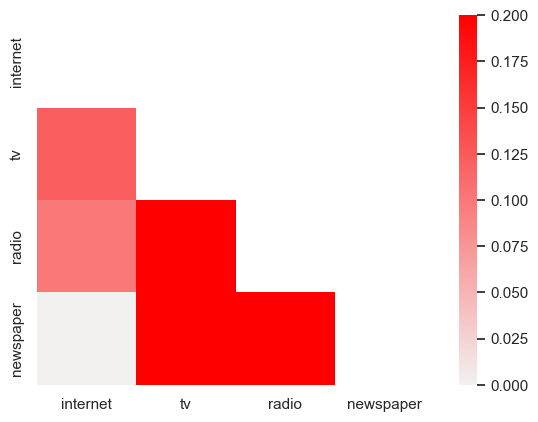

In [31]:
sns.set(style="white")
mask = np.zeros_like(corrmatrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette("red",as_cmap=True)
sns.heatmap(corrmatrix,mask=mask,cmap=cmap,vmin=0,vmax=.2)

## So...

there are lots of possibilities here. Remember: google is your friend here!


## More (non-graded) homework :)

Using the Iris dataset from last Wednesday, try the following:

1. Describe the dataset
2. Find the value counts of the 'species' column
3. Describe the dataset for each of the species separately.
4. Transpose the output for this previous command.
5. Create side-by-side histograms of petal length for each species.


Regardless whether you were able to do that, here's a really cool graphic to
show you. In this case, we're plotting petal width by petal length, with a
different color for each species. This also uses the seaborn library (indicated
by sns). Because of the nature of this dataset and the values within it, it
works quite well.)


In [32]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [33]:
iris.groupby('species').describe().T

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

array([[<Axes: title={'center': '(setosa,)'}>,
        <Axes: title={'center': '(versicolor,)'}>],
       [<Axes: title={'center': '(virginica,)'}>, <Axes: >]], dtype=object)

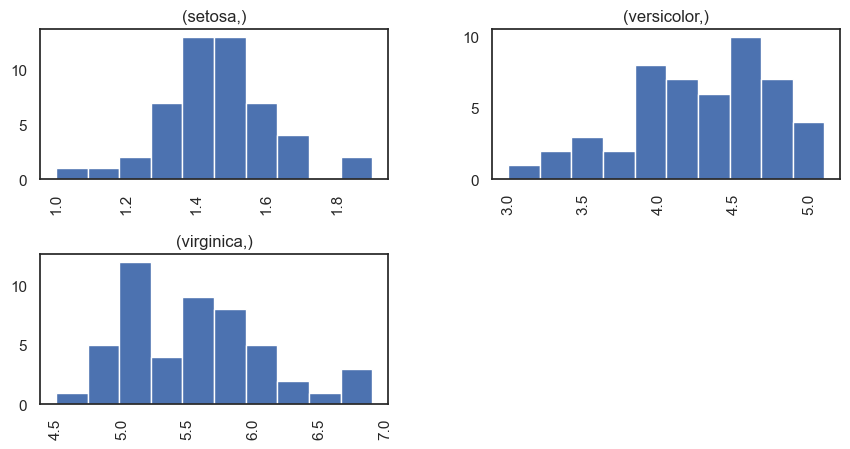

In [34]:
iris.hist(column='petal_length', by=['species'], figsize=(10,5))

<Axes: xlabel='petal_width', ylabel='petal_length'>

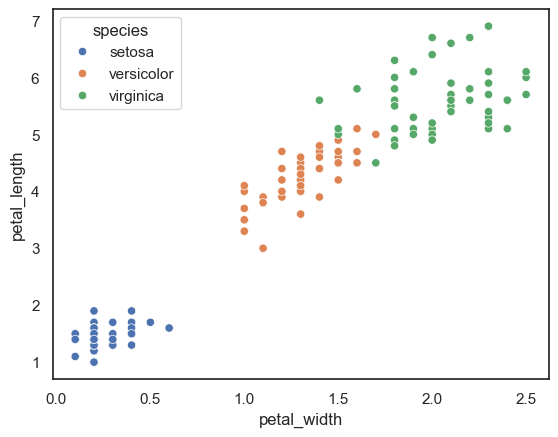

In [35]:
sns.scatterplot(x="petal_width", y="petal_length", hue="species", data=iris)

## Appendix: Multivariate statistical analysis

For those who are interested, here's a brief bit on multivariate analyses. Here,
we're focusing on the same comparison of internet news use between men and
women, but first, let's see whether that holds when we control for political
interest.

Before we can do that, we have to bring in another datset, however, and join it.
You can access this dataset and save it from the following URL:
https://raw.githubusercontent.com/damian0604/bdaca/master/ipynb/intpol.csv

We'll talk more about aggregating/merging datasets in a later session, so for
now just go with it.


In [36]:
# intpol=pd.read_csv('intpol.csv') # if you stored it locally 
intpol=pd.read_csv('https://raw.githubusercontent.com/damian0604/bdaca/master/ipynb/intpol.csv') # if reading it directly from the website

In [37]:
combined = df.join(intpol)

In [38]:
combined

,gender,age,education,radio,newspaper,tv,internet,meanmedia,intpol
0,1,71,4.0,5,6,5,0,4.00,4
1,1,40,2.0,6,0,0,0,1.50,1
2,1,41,2.0,4,3,7,3,4.25,4
3,0,65,5.0,0,0,5,0,1.25,4
4,0,39,2.0,0,1,7,7,3.75,1
...,...,...,...,...,...,...,...,...,...
2076,0,49,5.0,3,6,6,0,3.75,5
2077,0,51,4.0,7,7,5,5,6.00,6
2078,1,31,6.0,3,5,5,6,4.75,7
2079,0,58,6.0,3,3,1,0,1.75,3


Let's do an OLS regression. In order to do so, we need to define a model and
then run it. When defining the model, you create the equation in the following
manner:

- First you include your dependent variable, followed by the ~ sign
- Then you include the independent variables (separated by the + sign)


In [39]:
m1 = smf.ols(formula='internet ~ age + gender + education', data=combined).fit()

In [40]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               internet   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     63.91
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.65e-39
Time:                        17:29:58   Log-Likelihood:                -4951.8
No. Observations:                2065   AIC:                             9912.
Df Residuals:                    2061   BIC:                             9934.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1512      0.233      4.941      0.000       0.694       1.608
age           -0.0119      0.003     -3.675      0.000      -0.018      -0.006
gender         0.6224      0.118      5.283      0.000       0.391       0.853
education      0.4175      0.035     11.763      0.000       0.348       0.487
==============================================================================
Omnibus:                      976.493   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.053
Skew:                           0.481   Prob(JB):                     2.41e-41
Kurtosis:                       1.882   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
m2 = smf.ols(formula='internet ~ age + gender + education + intpol', data=combined).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               internet   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     57.45
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           5.12e-46
Time:                        17:30:01   Log-Likelihood:                -4934.5
No. Observations:                2065   AIC:                             9879.
Df Residuals:                    2060   BIC:                             9907.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0389      0.232      4.481      0.000       0.584       1.494
age           -0.0196      0.003     -5.642      0.000      -0.026      -0.013
gender         0.5212      0.118      4.413      0.000       0.290       0.753
education      0.3447      0.037      9.240      0.000       0.272       0.418
intpol         0.2230      0.038      5.910      0.000       0.149       0.297
==============================================================================
Omnibus:                      763.270   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.407
Skew:                           0.483   Prob(JB):                     1.10e-39
Kurtosis:                       1.926   Cond. No.                         200.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can also do a test to see whether M2 is better than M1 (it is, in this case:)
(see also
http://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.compare_lr_test.html?highlight=compare_lr_test
)


In [42]:
m2.compare_lr_test(m1)

(34.71733114293056, 3.8122257183791596e-09, 1.0)

## Hexplots

We have seen scatterplots at work above. Scatterplots are a cool way to show the
relationship between two variables, but they mainly work well if both variables
have a lot of different values (say, the money people earn in Euros' (and not in
categories!), or the time people spent on Facebook in exact minutes). However,
if we have only few possible values (such as the integers from 0 to 7, as in our
examples above), the dots in the scatterplot will overlap, and an observation
that only occurs one single time looks exactly like an observation that occurs
1000 times.

A hexplot is very much like a scatterplot, but _the more observations overlap at
the same (hexagon-shaped) place in the graph, the darker it gets._

To make it even more informative, we add histograms of the two variables in the
margin, so that you can immediately get an idea of the distributions. This,
again, helps us to understand whether there are just a few (very old, very
young) people that behave in some way (no media at all, media every day), or
whether it's a general pattern.


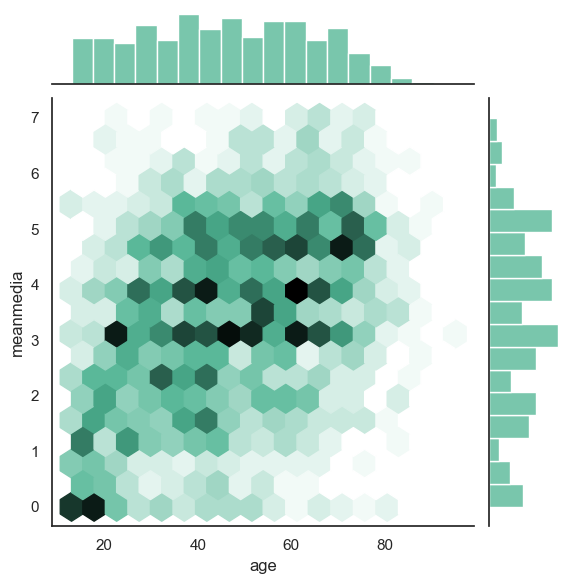

In [ ]:
sns.jointplot(x='age', y='meanmedia', data=combined, 
              kind="hex", color="#4CB391")